In [1]:
# Import des Librairies :

#Librairie d'analyse
import numpy as np
import pandas as pd

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#librairie de visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

# Pour supprimer les warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import pingouin as pg

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def pourcentage_valeurs_manquantes(data=pd.DataFrame):
    """
    Permet d'avoir un % de cellules manquantes.

    Parameters :
    ----------
    data: :class: 'Dataframe'
    DataFrame avec le pourcentage de données manquantes.

    """
    # avec un print possibilité d'avoir une visu par colonne
    somme = 0
    for i in list(data.columns):
        somme += data[i].isna().sum()
    return round((somme / (data.shape[0]*data.shape[1]))*100,2)

In [3]:
df = pd.read_csv('P3_non_standardiser.csv')

In [4]:
print(f"Le pourcentage de valeur manquantes est de :",pourcentage_valeurs_manquantes(df),"%")

Le pourcentage de valeur manquantes est de : 0.0 %


In [5]:
display(df.head())
display(df.describe())
display(df.dtypes)
display(df.shape)

,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Real_GFA,...,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,Taux_Elec,Taux_Gaz,Taux_Steam
0,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,12,60.0,7226362.5,249.98,88434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.18,0.28
1,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,11,61.0,8387933.0,295.86,103566.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39,0.61,0.00
2,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,41,43.0,72587024.0,2089.28,756493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.02,0.30
3,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,10,56.0,6794584.0,286.43,61320.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.27,0.33
4,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,18,75.0,14172606.0,505.01,191454.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.62,0.00


,Latitude,Longitude,NumberofBuildings,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Real_GFA,Age_du_batiment,x0_Adult Education,...,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,Taux_Elec,Taux_Gaz,Taux_Steam
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1.513000e+03,1513.000000,1.513000e+03,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,47.616387,-122.333480,1.180436,4.241904,66.172505,8.912720e+06,195.488929,1.223827e+05,54.295440,0.001322,...,0.001322,0.004627,0.000661,0.000661,0.006609,0.000661,0.000661,0.698566,0.275003,0.023014
std,0.047339,0.023374,3.071862,6.775962,23.529757,3.163718e+07,787.619884,3.160851e+05,32.563927,0.036346,...,0.036346,0.067884,0.025709,0.025709,0.081056,0.025709,0.025709,0.265845,0.265361,0.095082
min,47.509590,-122.411820,0.000000,0.000000,1.000000,5.713320e+04,-0.800000,0.000000e+00,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.340000,0.000000,0.000000
25%,47.586860,-122.342950,1.000000,1.000000,60.000000,1.244150e+06,20.640000,2.884100e+04,28.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000
50%,47.612670,-122.333050,1.000000,2.000000,71.000000,2.726369e+06,49.790000,4.817600e+04,51.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.230000,0.000000
75%,47.649090,-122.322640,1.000000,4.000000,79.000000,7.273156e+06,147.490000,1.040990e+05,86.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.490000,0.000000
max,47.733870,-122.261800,111.000000,99.000000,100.000000,8.739237e+08,16870.980000,9.320156e+06,116.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.770000


PrimaryPropertyType      object
Neighborhood             object
Latitude                float64
Longitude               float64
NumberofBuildings       float64
                         ...   
x2_Vocational School    float64
x2_Worship Facility     float64
Taux_Elec               float64
Taux_Gaz                float64
Taux_Steam              float64
Length: 151, dtype: object

(1513, 151)

In [6]:
import scipy.stats as stats
import scipy as st
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler # classe pour standardisation
from sklearn import preprocessing
from sklearn import decomposition

In [8]:
df.columns.tolist()

['PrimaryPropertyType',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'Real_GFA',
 'Age_du_batiment',
 'x0_Adult Education',
 'x0_Automobile Dealership',
 'x0_Bank Branch',
 'x0_College/University',
 'x0_Courthouse',
 'x0_Data Center',
 'x0_Distribution Center',
 'x0_Financial Office',
 'x0_Fire Station',
 'x0_Fitness Center/Health Club/Gym',
 'x0_Food Service',
 'x0_Hospital (General Medical & Surgical)',
 'x0_Hotel',
 'x0_K-12 School',
 'x0_Laboratory',
 'x0_Library',
 'x0_Lifestyle Center',
 'x0_Manufacturing/Industrial Plant',
 'x0_Medical Office',
 'x0_Movie Theater',
 'x0_Museum',
 'x0_Non-Refrigerated Warehouse',
 'x0_Office',
 'x0_Other',
 'x0_Other - Education',
 'x0_Other - Entertainment/Public Assembly',
 'x0_Other - Lodging/Residential',
 'x0_Other - Mall',
 'x0_Other - Public Services',
 'x0_Other - Recreation',
 'x0_Other - Restaurant/Bar',
 'x0_Other - Services',
 'x

In [9]:
categorical_features = df.select_dtypes(['object'])
numerical_features = df.select_dtypes(['float64','int64'])

Features = numerical_features.columns

In [10]:
# Suppression de la 2e colonne à interpréter :
#numerical_features.drop(columns=['SiteEnergyUse(kBtu)'],inplace=True)

In [11]:
# Supprimer les données inférieur ou égal à 0 :
numerical_features.drop(numerical_features[numerical_features.Real_GFA <= 0].index, axis = 0, inplace = True)

In [12]:
#numerical_features = pd.concat([numerical_features,one_hot],axis=1)
numerical_features

,Latitude,Longitude,NumberofBuildings,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Real_GFA,Age_du_batiment,x0_Adult Education,...,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,Taux_Elec,Taux_Gaz,Taux_Steam
0,47.61220,-122.33799,1.0,12,60.0,7.226362e+06,249.98,88434.0,89,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.18,0.28
1,47.61317,-122.33393,1.0,11,61.0,8.387933e+06,295.86,103566.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39,0.61,0.00
2,47.61393,-122.33810,1.0,41,43.0,7.258702e+07,2089.28,756493.0,47,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.02,0.30
3,47.61412,-122.33664,1.0,10,56.0,6.794584e+06,286.43,61320.0,90,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.27,0.33
4,47.61375,-122.34047,1.0,18,75.0,1.417261e+07,505.01,191454.0,36,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.62,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,47.54067,-122.37441,1.0,1,71.0,9.320821e+05,20.33,18261.0,34,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.32,0.00
1509,47.59625,-122.32283,1.0,1,71.0,9.502762e+05,32.17,16000.0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.58,0.00
1510,47.63644,-122.35784,1.0,1,71.0,5.765898e+06,223.54,13157.0,42,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.31,0.69,0.00
1511,47.52832,-122.32431,1.0,1,71.0,7.194712e+05,22.11,13586.0,27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.52,0.00


In [13]:
y = numerical_features['TotalGHGEmissions']
X = numerical_features.drop(['TotalGHGEmissions'],axis=1)

In [14]:
# = np.log(y)

In [15]:
X_train, X_test, y_train, y_test = \
train_test_split(X,
                 y,
                 test_size=0.33, # 33% des données dans le jeu de test
                 random_state = 0
                )

In [16]:
import math
# Centrage et Réduction
col = X_test.columns
std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col, index=X_train.index )
X_test_scaled = std_scale.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col, index=X_test.index)
#y_train_log = np.exp(y_train) a tester 
#y_test_log = np.exp(y_test) a tester

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import math # pour le RMSE
from sklearn.metrics import r2_score

# Ridge :

In [18]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# define model

model = Ridge(alpha=1.0, random_state=0)
model.fit(X_train_scaled, y_train)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
# evaluate model
scores = cross_val_score(model,X_train_scaled, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive and mean
scores = absolute(scores).mean()
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.5504532678453773
Train R^2 Score :  0.9269665185129566
-----------------------------------------------------


In [19]:
"""from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = Ridge(random_state=0)

params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] ,
                "fit_intercept": [True, False],
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }
Ridge_GS = GridSearchCV(model, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
display(Ridge_GS.best_params_)


Ridgeregression = Ridge(random_state=0, **Ridge_GS.best_params_)
Train_score = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)
display(Train_score.mean()) # => Score de train

Ridgeregression.fit(X_train,y_train)
Ridgeregression.score(X_test,y_test) # => Score de test"""

'from sklearn.linear_model import Ridge\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import cross_val_score\n\nmodel = Ridge(random_state=0)\n\nparams_Ridge = {\'alpha\': [1,0.1,0.01,0.001,0.0001,0] ,\n                "fit_intercept": [True, False],\n                "solver": [\'svd\', \'cholesky\', \'lsqr\', \'sparse_cg\', \'sag\', \'saga\']\n               }\nRidge_GS = GridSearchCV(model, param_grid=params_Ridge, n_jobs=-1)\nRidge_GS.fit(X_train,y_train)\ndisplay(Ridge_GS.best_params_)\n\n\nRidgeregression = Ridge(random_state=0, **Ridge_GS.best_params_)\nTrain_score = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)\ndisplay(Train_score.mean()) # => Score de train\n\nRidgeregression.fit(X_train,y_train)\nRidgeregression.score(X_test,y_test) # => Score de test'

In [20]:
y_predict = model.predict(X_test_scaled)
Score = {}
Score['Ridge'] = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  #'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  #'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean(),
                 # 'Time_process' : round(model.cv_results_['mean_fit_time'].max(), 3)
                 }
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762}}

## Visualisation :

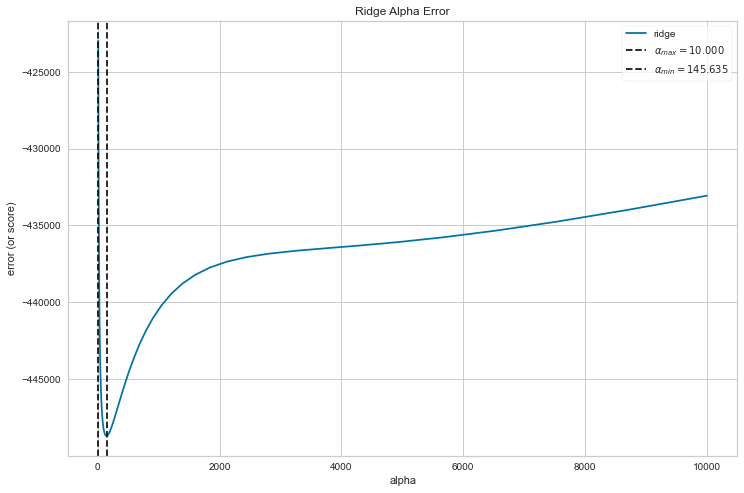

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [21]:
from yellowbrick.regressor import ManualAlphaSelection
# Instantiate the visualizer
alphas = np.logspace(1, 4, 50)
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=5,
    scoring="neg_mean_squared_error"
)
plt.figure(figsize=(12,8))
visualizer.fit(X_train, y_train)
visualizer.show()

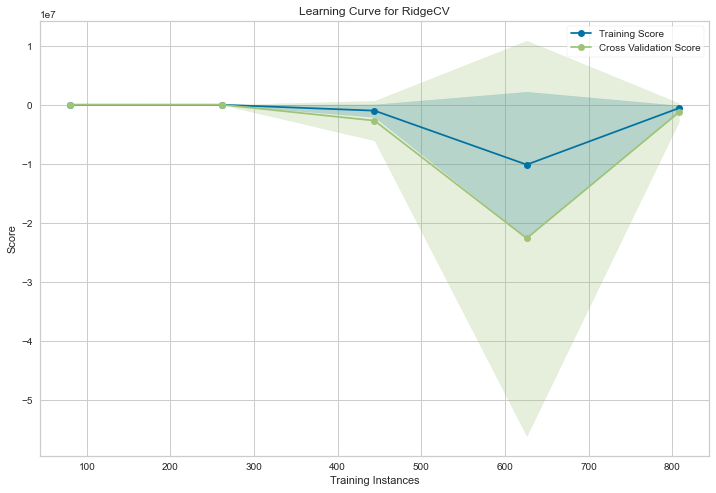

<AxesSubplot:title={'center':'Learning Curve for RidgeCV'}, xlabel='Training Instances', ylabel='Score'>

In [22]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import RidgeCV
# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')
plt.figure(figsize=(12,8))
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

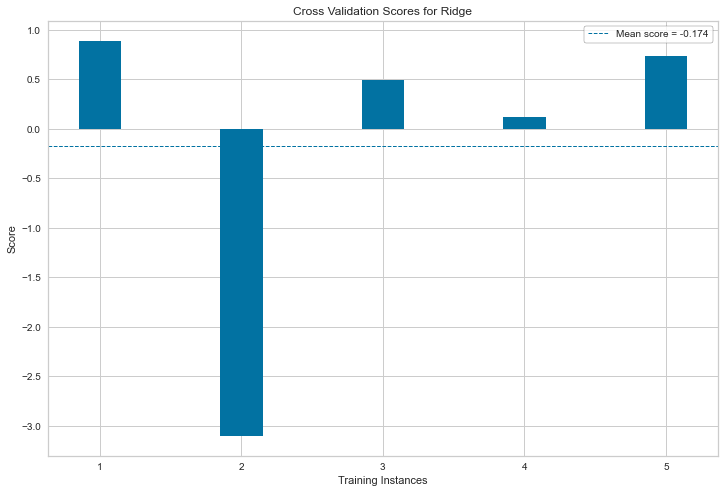

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
from sklearn.linear_model import Ridge
from yellowbrick.model_selection import CVScores

# Instantiate the regression model and visualizer
cv =5

model = Ridge()
visualizer = CVScores(model, cv=cv, scoring='r2')
plt.figure(figsize=(12,8))
visualizer.fit(X_train, y_train)      # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Lasso :

In [24]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
# define model
model = Lasso(alpha=1.0)
model.fit(X_train_scaled, y_train)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
# evaluate model
scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=cv, n_jobs=-1, verbose=3)
# force scores to be positive and mean
scores = absolute(scores).mean()
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


-----------------------------------------------------
Test  R^2 Score :  0.5570493291735725
Train R^2 Score :  0.9263893260703999
-----------------------------------------------------


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [25]:
"""from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = Lasso(random_state=0)

params_Lasso = {'alpha': [1,0.1,0.01,0.001,0.0001,0] ,
                "fit_intercept": [True, False],
                #"solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }
Lasso_GS = GridSearchCV(model, param_grid=params_Lasso, n_jobs=-1)
Lasso_GS.fit(X_train,y_train)
display(Lasso_GS.best_params_)


Lassoregression = Lasso(random_state=0, **Lasso_GS.best_params_)
Train_score = cross_val_score(estimator=Lassoregression, X=X_train, y=y_train, cv=5)
display(Train_score.mean()) # => Score de train

Lassoregression.fit(X_train,y_train)
Lassoregression.score(X_test,y_test) # => Score de test"""

'from sklearn.linear_model import Lasso\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import cross_val_score\n\nmodel = Lasso(random_state=0)\n\nparams_Lasso = {\'alpha\': [1,0.1,0.01,0.001,0.0001,0] ,\n                "fit_intercept": [True, False],\n                #"solver": [\'svd\', \'cholesky\', \'lsqr\', \'sparse_cg\', \'sag\', \'saga\']\n               }\nLasso_GS = GridSearchCV(model, param_grid=params_Lasso, n_jobs=-1)\nLasso_GS.fit(X_train,y_train)\ndisplay(Lasso_GS.best_params_)\n\n\nLassoregression = Lasso(random_state=0, **Lasso_GS.best_params_)\nTrain_score = cross_val_score(estimator=Lassoregression, X=X_train, y=y_train, cv=5)\ndisplay(Train_score.mean()) # => Score de train\n\nLassoregression.fit(X_train,y_train)\nLassoregression.score(X_test,y_test) # => Score de test'

In [26]:
y_predict = model.predict(X_test_scaled)
Score['Lasso'] ={'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  #'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                 # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean(),
                 }
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762},
 'Lasso': {'r2': 0.5570493291735725,
  'Training_score': 0.9263893260703999,
  'MAE': 104.84765753206517,
  'MSE': 69948.82635354671,
  'RMSE': 264.47840432357935,
  'Cross_validate': -0.13884863281573093}}

## Visualisation :

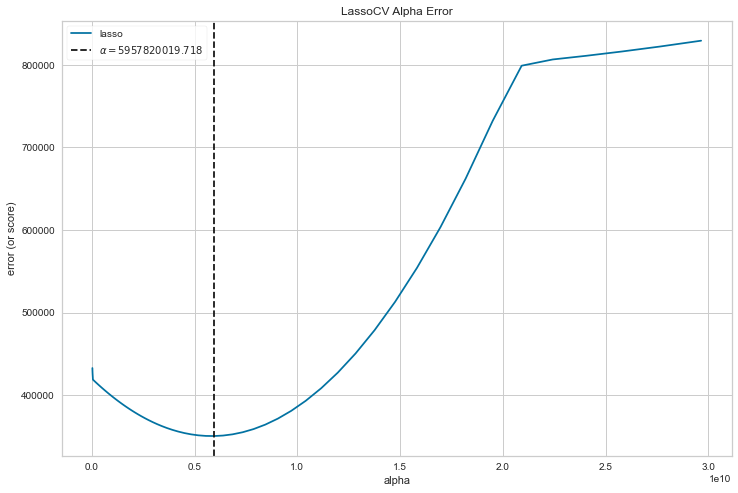

AlphaSelection(ax=<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>,
               estimator=LassoCV(random_state=0))

In [27]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas
# Use the quick method and immediately show the figure
plt.figure(figsize=(12,8))
alphas(LassoCV(random_state=0), X_train, y_train)

# Elastic Net :

In [28]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0,random_state=0)
model.fit(X_train_scaled, y_train)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
# evaluate model
scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive and mean
scores = absolute(scores).mean()
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.6358690408852374
Train R^2 Score :  0.7719166298878981
-----------------------------------------------------


In [29]:
y_predict = model.predict(X_test_scaled)
Score['Elastic_Net']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                 # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                 # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762},
 'Lasso': {'r2': 0.5570493291735725,
  'Training_score': 0.9263893260703999,
  'MAE': 104.84765753206517,
  'MSE': 69948.82635354671,
  'RMSE': 264.47840432357935,
  'Cross_validate': -0.13884863281573093},
 'Elastic_Net': {'r2': 0.6358690408852374,
  'Training_score': 0.7719166298878981,
  'MAE': 104.50172962361248,
  'MSE': 57501.96332595623,
  'RMSE': 239.7956699483046,
  'Cross_validate': 0.4480277219436516}}

# Random Forest :

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=0)

model.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.8139840006028662
Train R^2 Score :  0.9842456342671596
-----------------------------------------------------


In [31]:
y_predict = model.predict(X_test_scaled)
Score['Random_forest']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                 # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                 # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762},
 'Lasso': {'r2': 0.5570493291735725,
  'Training_score': 0.9263893260703999,
  'MAE': 104.84765753206517,
  'MSE': 69948.82635354671,
  'RMSE': 264.47840432357935,
  'Cross_validate': -0.13884863281573093},
 'Elastic_Net': {'r2': 0.6358690408852374,
  'Training_score': 0.7719166298878981,
  'MAE': 104.50172962361248,
  'MSE': 57501.96332595623,
  'RMSE': 239.7956699483046,
  'Cross_validate': 0.4480277219436516},
 'Random_forest': {'r2': 0.8139840006028662,
  'Training_score': 0.9842456342671596,
  'MAE': 29.164485943775112,
  'MSE': 29374.83042194155,
  'RMSE': 171.39087029927106,
  'Cross_validate': 0.031058347446088774}}

## Visualisation :

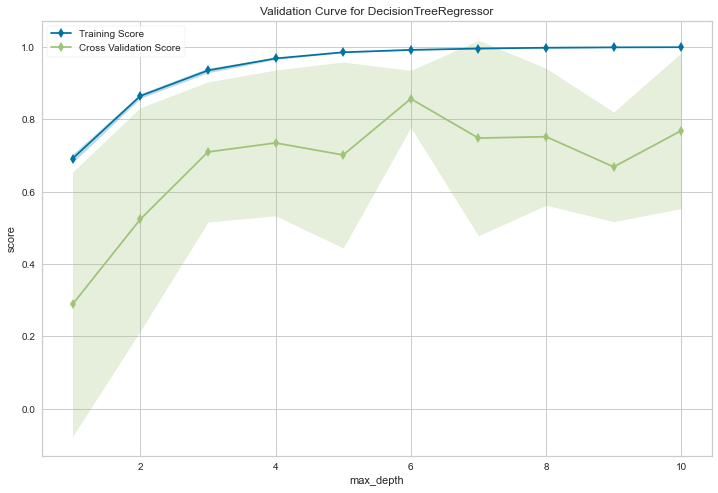

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [32]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=5, scoring="r2"
)

# Fit and show the visualizer
plt.figure(figsize=(12,8))
viz.fit(X, y)
viz.show()

# Xgboost :

In [33]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=0)
model.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.9143446372566354
Train R^2 Score :  0.9999979460316666
-----------------------------------------------------


In [34]:
y_predict = model.predict(X_test_scaled)
Score['xgboost']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                 # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                 # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762},
 'Lasso': {'r2': 0.5570493291735725,
  'Training_score': 0.9263893260703999,
  'MAE': 104.84765753206517,
  'MSE': 69948.82635354671,
  'RMSE': 264.47840432357935,
  'Cross_validate': -0.13884863281573093},
 'Elastic_Net': {'r2': 0.6358690408852374,
  'Training_score': 0.7719166298878981,
  'MAE': 104.50172962361248,
  'MSE': 57501.96332595623,
  'RMSE': 239.7956699483046,
  'Cross_validate': 0.4480277219436516},
 'Random_forest': {'r2': 0.8139840006028662,
  'Training_score': 0.9842456342671596,
  'MAE': 29.164485943775112,
  'MSE': 29374.83042194155,
  'RMSE': 171.39087029927106,
  'Cross_validate': 0.031058347446088774},
 'xgboost': {'r2': 0.9143446372566354,
  'Training_score': 0.9999979460316666,
  'MAE': 22.537646832509218,
  'MSE': 13526.319044978847,
  'RMSE': 116.3027043751

# SVR : 

In [35]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  -0.05366591464039061
Train R^2 Score :  -0.025899293793087752
-----------------------------------------------------


In [36]:
y_predict = model.predict(X_test_scaled)
Score['SVR']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                 # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                 # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762},
 'Lasso': {'r2': 0.5570493291735725,
  'Training_score': 0.9263893260703999,
  'MAE': 104.84765753206517,
  'MSE': 69948.82635354671,
  'RMSE': 264.47840432357935,
  'Cross_validate': -0.13884863281573093},
 'Elastic_Net': {'r2': 0.6358690408852374,
  'Training_score': 0.7719166298878981,
  'MAE': 104.50172962361248,
  'MSE': 57501.96332595623,
  'RMSE': 239.7956699483046,
  'Cross_validate': 0.4480277219436516},
 'Random_forest': {'r2': 0.8139840006028662,
  'Training_score': 0.9842456342671596,
  'MAE': 29.164485943775112,
  'MSE': 29374.83042194155,
  'RMSE': 171.39087029927106,
  'Cross_validate': 0.031058347446088774},
 'xgboost': {'r2': 0.9143446372566354,
  'Training_score': 0.9999979460316666,
  'MAE': 22.537646832509218,
  'MSE': 13526.319044978847,
  'RMSE': 116.3027043751

# KNN : 

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train_scaled,y_train)

print("-"*53)
print("Test  R^2 Score : ", model.score(X_test, y_test))
print("Train R^2 Score : ", model.score(X_train, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  -690.4234849587167
Train R^2 Score :  -126.97098729998547
-----------------------------------------------------


In [38]:
model.predict(X_test_scaled)

array([6.992600e+01, 1.151140e+02, 4.945800e+01, 3.584140e+02,
       4.910280e+02, 2.693200e+01, 7.839000e+01, 2.661500e+02,
       2.777400e+01, 4.522400e+01, 4.532300e+02, 1.398620e+02,
       1.751780e+02, 5.134400e+01, 4.131940e+02, 6.673600e+01,
       8.611800e+01, 6.616600e+01, 4.660000e+01, 3.706400e+01,
       9.335000e+01, 6.756800e+01, 1.187800e+02, 4.791400e+01,
       3.266200e+01, 2.204000e+00, 9.486000e+01, 4.165200e+01,
       1.250800e+01, 1.930680e+02, 1.975140e+02, 6.319600e+01,
       1.191620e+02, 6.430200e+01, 3.060400e+01, 7.793000e+01,
       5.782000e+01, 9.032200e+01, 8.708000e+01, 6.230200e+01,
       9.146400e+01, 6.008800e+01, 2.350120e+02, 3.578000e+01,
       3.912600e+01, 2.810440e+02, 3.464540e+02, 3.812760e+02,
       4.864000e+00, 2.040600e+01, 9.097400e+01, 5.589200e+01,
       1.602600e+01, 1.671400e+02, 1.741960e+02, 1.233800e+01,
       2.059300e+02, 3.909200e+01, 1.993140e+02, 2.425000e+01,
       8.487400e+01, 7.546260e+02, 4.470000e+00, 7.8968

In [39]:
y_predict = model.predict(X_test_scaled)
Score['KNN']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                 # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                 # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762},
 'Lasso': {'r2': 0.5570493291735725,
  'Training_score': 0.9263893260703999,
  'MAE': 104.84765753206517,
  'MSE': 69948.82635354671,
  'RMSE': 264.47840432357935,
  'Cross_validate': -0.13884863281573093},
 'Elastic_Net': {'r2': 0.6358690408852374,
  'Training_score': 0.7719166298878981,
  'MAE': 104.50172962361248,
  'MSE': 57501.96332595623,
  'RMSE': 239.7956699483046,
  'Cross_validate': 0.4480277219436516},
 'Random_forest': {'r2': 0.8139840006028662,
  'Training_score': 0.9842456342671596,
  'MAE': 29.164485943775112,
  'MSE': 29374.83042194155,
  'RMSE': 171.39087029927106,
  'Cross_validate': 0.031058347446088774},
 'xgboost': {'r2': 0.9143446372566354,
  'Training_score': 0.9999979460316666,
  'MAE': 22.537646832509218,
  'MSE': 13526.319044978847,
  'RMSE': 116.3027043751

## Visualisation :

In [40]:
"""cv = 5
param_range = np.arange(3, 20, 2)

oz = ValidationCurve(
    KNeighborsRegressor(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="r2", n_jobs=-1,
)

# Using the same game dataset as in the SVC example
plt.figure(figsize=(12,8))
oz.fit(X_train, y_train)
oz.show()"""

'cv = 5\nparam_range = np.arange(3, 20, 2)\n\noz = ValidationCurve(\n    KNeighborsRegressor(), param_name="n_neighbors",\n    param_range=param_range, cv=cv, scoring="r2", n_jobs=-1,\n)\n\n# Using the same game dataset as in the SVC example\nplt.figure(figsize=(12,8))\noz.fit(X_train, y_train)\noz.show()'

# Linear Regression : 

In [41]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", lin.score(X_test_scaled, y_test))
print("Train R^2 Score : ", lin.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  -2.105106489912649e+25
Train R^2 Score :  0.926941169329679
-----------------------------------------------------


In [42]:
# Transformation inverse pour calculer les métriques pour revenir aux vraies valeurs (revenir quasiment à la même chose)

In [43]:
y_predict = lin.predict(X_test_scaled)
Score['Linear_Regression']  = {
    'r2': r2_score(y_test, y_predict),
    'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
    'MAE' : mean_absolute_error(y_test, y_predict),
    'MSE' : mean_squared_error(y_test, y_predict, squared=True),
   # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
    'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
   # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
    'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
}
Score

{'Ridge': {'r2': 0.5504532678453773,
  'Training_score': 0.9269665185129566,
  'MAE': 110.19090821242476,
  'MSE': 70990.44741623175,
  'RMSE': 266.44032618249014,
  'Cross_validate': -0.15090226445507762},
 'Lasso': {'r2': 0.5570493291735725,
  'Training_score': 0.9263893260703999,
  'MAE': 104.84765753206517,
  'MSE': 69948.82635354671,
  'RMSE': 264.47840432357935,
  'Cross_validate': -0.13884863281573093},
 'Elastic_Net': {'r2': 0.6358690408852374,
  'Training_score': 0.7719166298878981,
  'MAE': 104.50172962361248,
  'MSE': 57501.96332595623,
  'RMSE': 239.7956699483046,
  'Cross_validate': 0.4480277219436516},
 'Random_forest': {'r2': 0.8139840006028662,
  'Training_score': 0.9842456342671596,
  'MAE': 29.164485943775112,
  'MSE': 29374.83042194155,
  'RMSE': 171.39087029927106,
  'Cross_validate': 0.031058347446088774},
 'xgboost': {'r2': 0.9143446372566354,
  'Training_score': 0.9999979460316666,
  'MAE': 22.537646832509218,
  'MSE': 13526.319044978847,
  'RMSE': 116.3027043751

# DataFrame des Scores des Algos :

In [44]:
df_final = pd.DataFrame.from_dict(Score, orient='index')
df_final = df_final.sort_values(by=['r2'], ascending = False)
df_final_2 = df_final.sort_values(by=['Cross_validate'], ascending = False)
df_final_3 = df_final.sort_values(by=['Training_score'], ascending = False)
print("-"*80)
print(" "*30,'\033[1m' + "Classement par R2 :" + '\033[0m')
print("-"*80)
display(df_final)
print("")
print("-"*80)
print(" "*20,'\033[1m' + "Classement par Validation Croisée :" + '\033[0m')
print("-"*80)
display(df_final_2)
print("")
print("-"*80)
print(" "*20, '\033[1m' + "Classement par Score d'entrainement :" + '\033[0m')
print("-"*80)
display(df_final_3)
# Utiliser les log MSLE + RMSLE pour avoir un vrai indicateur explicable
## Score Training 

--------------------------------------------------------------------------------
                               Classement par R2 :
--------------------------------------------------------------------------------


,r2,Training_score,MAE,MSE,RMSE,Cross_validate
xgboost,9.143446e-01,0.999998,2.253765e+01,1.352632e+04,1.163027e+02,-0.190419
Random_forest,8.139840e-01,0.984246,2.916449e+01,2.937483e+04,1.713909e+02,0.031058
Elastic_Net,6.358690e-01,0.771917,1.045017e+02,5.750196e+04,2.397957e+02,0.448028
Lasso,5.570493e-01,0.926389,1.048477e+02,6.994883e+04,2.644784e+02,-0.138849
Ridge,5.504533e-01,0.926967,1.101909e+02,7.099045e+04,2.664403e+02,-0.150902
KNN,2.978141e-01,0.679831,1.144935e+02,1.108861e+05,3.329957e+02,0.211198
SVR,-5.366591e-02,-0.025899,1.289833e+02,1.663903e+05,4.079097e+02,-0.065120
Linear_Regression,-2.105106e+25,0.679831,1.108019e+14,3.324292e+30,1.823264e+15,0.211198



--------------------------------------------------------------------------------
                     Classement par Validation Croisée :
--------------------------------------------------------------------------------


,r2,Training_score,MAE,MSE,RMSE,Cross_validate
Elastic_Net,6.358690e-01,0.771917,1.045017e+02,5.750196e+04,2.397957e+02,0.448028
KNN,2.978141e-01,0.679831,1.144935e+02,1.108861e+05,3.329957e+02,0.211198
Linear_Regression,-2.105106e+25,0.679831,1.108019e+14,3.324292e+30,1.823264e+15,0.211198
Random_forest,8.139840e-01,0.984246,2.916449e+01,2.937483e+04,1.713909e+02,0.031058
SVR,-5.366591e-02,-0.025899,1.289833e+02,1.663903e+05,4.079097e+02,-0.065120
Lasso,5.570493e-01,0.926389,1.048477e+02,6.994883e+04,2.644784e+02,-0.138849
Ridge,5.504533e-01,0.926967,1.101909e+02,7.099045e+04,2.664403e+02,-0.150902
xgboost,9.143446e-01,0.999998,2.253765e+01,1.352632e+04,1.163027e+02,-0.190419



--------------------------------------------------------------------------------
                     Classement par Score d'entrainement :
--------------------------------------------------------------------------------


,r2,Training_score,MAE,MSE,RMSE,Cross_validate
xgboost,9.143446e-01,0.999998,2.253765e+01,1.352632e+04,1.163027e+02,-0.190419
Random_forest,8.139840e-01,0.984246,2.916449e+01,2.937483e+04,1.713909e+02,0.031058
Ridge,5.504533e-01,0.926967,1.101909e+02,7.099045e+04,2.664403e+02,-0.150902
Lasso,5.570493e-01,0.926389,1.048477e+02,6.994883e+04,2.644784e+02,-0.138849
Elastic_Net,6.358690e-01,0.771917,1.045017e+02,5.750196e+04,2.397957e+02,0.448028
KNN,2.978141e-01,0.679831,1.144935e+02,1.108861e+05,3.329957e+02,0.211198
Linear_Regression,-2.105106e+25,0.679831,1.108019e+14,3.324292e+30,1.823264e+15,0.211198
SVR,-5.366591e-02,-0.025899,1.289833e+02,1.663903e+05,4.079097e+02,-0.065120


Nos données nétant pas des données linéaires, nous ne pouvons pas utiliser le MSLE et le RMSLE car elles sont négatives, la confirmation venant du r2.

# Choix de l'algo et optimisation :

Le choix se porte sur Xgboost, car il est le meilleure en R2 ainsi qu'en cross-validation.

In [45]:
## Optimiser et améliorer les hyperparamétres de test de Xgboost avec Energy Star Score
## Comparer l'impact

## Algo optimisé avec Energy Star Score :

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
regressor = XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]


hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               n_iter=50,
                               scoring = 'neg_mean_absolute_error',n_jobs = -1,
                               return_train_score = True,
                               random_state=0)

random_cv.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 10, 100],
                                        'n_estimators': [100, 400, 800]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [48]:
regressor = XGBRegressor(**random_cv.best_params_)

regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
print("-"*53)
print("Test  R^2 Score : ", regressor.score(X_test_scaled, y_test))
print("Train R^2 Score : ", regressor.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.9276398352555185
Train R^2 Score :  0.9999986279618276
-----------------------------------------------------


In [49]:
Visualisation_r2 = {}
y_predict = regressor.predict(X_test_scaled)
Visualisation_r2['Avec_params/avec_EnergyStarScore']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, regressor.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  #'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  #'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(regressor, X_train_scaled, y_train, cv=5)).mean()
                 }
Visualisation_r2

{'Avec_params/avec_EnergyStarScore': {'r2': 0.9276398352555185,
  'Training_score': 0.9999986279618276,
  'MAE': 20.333161241246998,
  'MSE': 11426.799713797358,
  'RMSE': 106.89621000670397,
  'Cross_validate': -0.21677025580125076}}

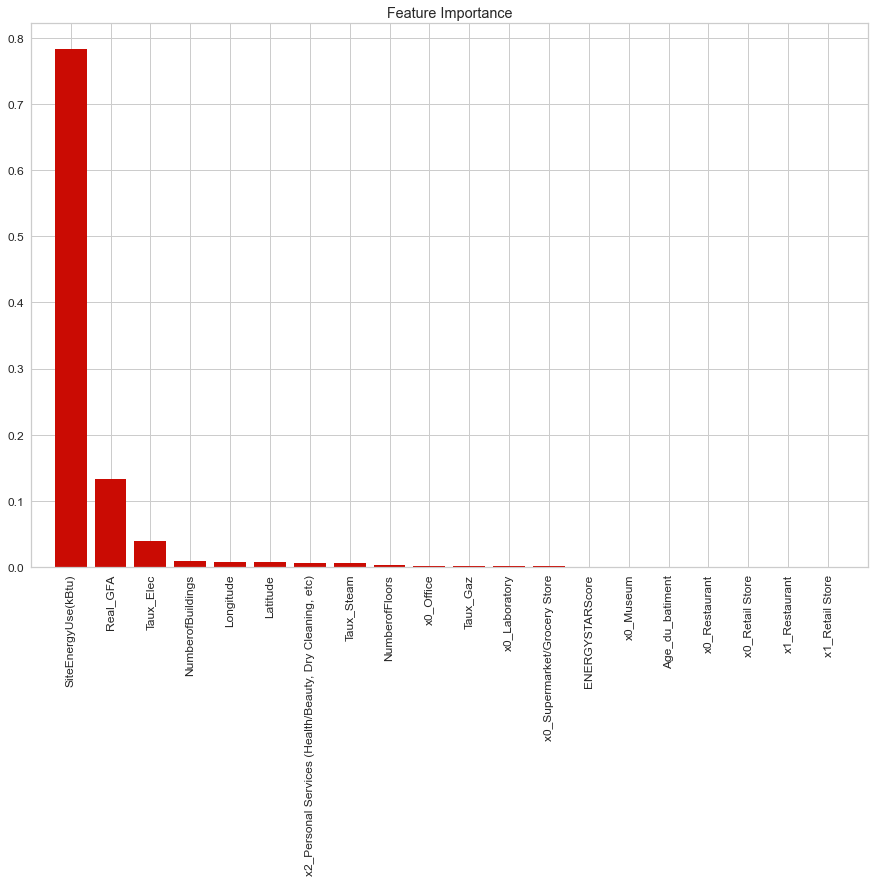

In [50]:
import scikitplot as sck
fig, ax = plt.subplots(figsize=(15,10))
sck.estimators.plot_feature_importances(random_cv.best_estimator_, feature_names = X.columns,ax=ax)
plt.xticks(rotation=90)
plt.show()

## Algo optimisé sans Energy Star Score :

In [51]:
# Maintenant on va réutiliser nos paramétres en supprimant l'energy Star Score.

In [52]:
y = numerical_features['TotalGHGEmissions']
X = numerical_features.drop(['TotalGHGEmissions','Taux_Gaz','ENERGYSTARScore'],axis=1)
#y = np.log(y)
X_train, X_test, y_train, y_test = \
train_test_split(X,
                 y,
                 test_size=0.33, # 33% des données dans le jeu de test
                 random_state = 0
                )
# Centrage et Réduction
col = X_test.columns
std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col, index=X_train.index )
X_test_scaled = std_scale.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col, index=X_test.index)
#y_train_log = np.exp(y_train) a tester 
#y_test_log = np.exp(y_test) a tester

In [53]:
regressor_v2 = XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor_v2,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               n_iter=50,
                               scoring = 'neg_mean_absolute_error',n_jobs = -1,
                               return_train_score = True,
                               random_state=0)

random_cv.fit(X_train_scaled, y_train)

display(random_cv.best_estimator_)
display(random_cv.cv_results_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

{'mean_fit_time': array([ 5.13109965,  0.51502113,  1.95468168,  3.73827047,  5.4589438 ,
         5.47230535,  0.44282503,  1.8598752 ,  6.23800015,  6.08203583,
        10.80180779,  0.71463084,  1.39104066,  0.50989265,  4.51785622,
         3.7374958 ,  0.50789986,  0.84499431,  6.55497146,  0.43088112,
         0.63309584,  1.74134073,  5.51290936,  5.81734486,  3.4909224 ,
         2.91247301,  1.84833183,  1.28337827,  5.39254427,  0.86674418,
         3.6009326 ,  0.44797106,  3.5303297 ,  6.73216004,  3.61407905,
         1.7691699 ,  1.77963901,  7.34034328,  0.47955418, 10.67422118,
         3.82159476,  1.75467649,  1.23852978,  0.67129021,  1.77645617,
         3.51093283,  6.40058079,  6.42782707,  2.63418698,  4.10730209]),
 'std_fit_time': array([0.06716607, 0.02287142, 0.18882591, 0.03166281, 0.16916562,
        0.60033472, 0.00977145, 0.10686633, 0.08884593, 0.15446974,
        0.175358  , 0.06404092, 0.06006746, 0.0239557 , 0.26685378,
        0.10318972, 0.03440691,

In [54]:
regressor_v2 = XGBRegressor(**random_cv.best_params_)

regressor_v2.fit(X_train_scaled, y_train)
y_pred = regressor_v2.predict(X_test_scaled)
print("-"*53)
print("Test  R^2 Score : ", regressor_v2.score(X_test_scaled, y_test))
print("Train R^2 Score : ", regressor_v2.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.927454266896539
Train R^2 Score :  0.9999999615283977
-----------------------------------------------------


In [55]:
y_predict = regressor_v2.predict(X_test_scaled)
Visualisation_r2['Avec_params/sans_EnergyStarScore']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, regressor_v2.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                 # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                 # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(regressor_v2, X_train_scaled, y_train, cv=5)).mean()
                 }
Visualisation_r2

{'Avec_params/avec_EnergyStarScore': {'r2': 0.9276398352555185,
  'Training_score': 0.9999986279618276,
  'MAE': 20.333161241246998,
  'MSE': 11426.799713797358,
  'RMSE': 106.89621000670397,
  'Cross_validate': -0.21677025580125076},
 'Avec_params/sans_EnergyStarScore': {'r2': 0.927454266896539,
  'Training_score': 0.9999999615283977,
  'MAE': 21.045436260570963,
  'MSE': 11456.103854808709,
  'RMSE': 107.0331904355313,
  'Cross_validate': -0.17581794363694891}}

In [56]:
Visualisation_r2['Sans_params/avec_EnergyStarScore'] = Score['xgboost']               
Visualisation_r2['Avec_params/avec_EnergyStarScore'] = Visualisation_r2['Avec_params/avec_EnergyStarScore']
Visualisation_r2['Avec_params/sans_EnergyStarScore'] = Visualisation_r2['Avec_params/sans_EnergyStarScore'] 
Visualisation_r2

{'Avec_params/avec_EnergyStarScore': {'r2': 0.9276398352555185,
  'Training_score': 0.9999986279618276,
  'MAE': 20.333161241246998,
  'MSE': 11426.799713797358,
  'RMSE': 106.89621000670397,
  'Cross_validate': -0.21677025580125076},
 'Avec_params/sans_EnergyStarScore': {'r2': 0.927454266896539,
  'Training_score': 0.9999999615283977,
  'MAE': 21.045436260570963,
  'MSE': 11456.103854808709,
  'RMSE': 107.0331904355313,
  'Cross_validate': -0.17581794363694891},
 'Sans_params/avec_EnergyStarScore': {'r2': 0.9143446372566354,
  'Training_score': 0.9999979460316666,
  'MAE': 22.537646832509218,
  'MSE': 13526.319044978847,
  'RMSE': 116.30270437517284,
  'Cross_validate': -0.19041861489723175}}

In [57]:
df_r2 = pd.DataFrame.from_dict(Visualisation_r2, orient='index')
df_r2 = df_r2.sort_values(by=['r2'], ascending = False)
df_r2
# Sur entrainement des données mais le train > test donc c'est " OK "

,r2,Training_score,MAE,MSE,RMSE,Cross_validate
Avec_params/avec_EnergyStarScore,0.927640,0.999999,20.333161,11426.799714,106.896210,-0.216770
Avec_params/sans_EnergyStarScore,0.927454,1.000000,21.045436,11456.103855,107.033190,-0.175818
Sans_params/avec_EnergyStarScore,0.914345,0.999998,22.537647,13526.319045,116.302704,-0.190419


In [58]:
round((0.932657 - 0.927640)*100,2)

0.5

In [59]:
# On peut voir qu'en retirant l'EnergyStarScore on perds environ 3% de r2 ce qui reste négligeable au vu de notre score relativement élevé.